In [2]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the diabetes_w_in_24hr.csv.
import pandas as pd
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Nikko/Resources/Diabetes_w_in_24hr.csv')
# Display the first few rows
diabetes_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


# Clean, Standardize, and Encode Categorical Data

In [3]:
# remove extra info
# reduced dataset to measurements taken within 24 hours (as opposed to only within the first hour after admission)
# simplified invasive/noninvasive/combined measurements to only the combined measurements
clean_diabetes_df = diabetes_df.drop(columns=['Unnamed: 0', 'encounter_id', 'hospital_id', 'elective_surgery', 'icu_admit_source', 'icu_id',
                                              'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
                                              'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
                                              'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_sysbp_invasive_max',
                                              'd1_sysbp_invasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'h1_diasbp_invasive_max',
                                              'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
                                              'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min',
                                              'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
                                              'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
                                              'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max',
                                              'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
                                              'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max',
                                              'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max',
                                              'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max',
                                              'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max',
                                              'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'solid_tumor_with_metastasis'])



In [4]:
# count nulls, remove columns where null values exist for > 5000 of the rows
null_col_check = clean_diabetes_df.isnull().sum(axis=0)
null_col_check = null_col_check[null_col_check != 0][null_col_check > 5000]
remove_cols = []
for i, v in null_col_check.items():
  remove_cols.append(i)

clean_diabetes_df = clean_diabetes_df.drop(columns=remove_cols)

In [5]:
# then decide which columns to remove altogether and which rows to remove due to nulls
null_row_check = clean_diabetes_df.isnull().sum(axis=1)
null_row_check = null_row_check[null_row_check != 0]
remove_rows = []
for i, v in null_row_check.items():
  remove_rows.append(i)

clean_diabetes_df = clean_diabetes_df.drop(remove_rows, axis=0)

In [6]:
# scale numerical columns due to large differences in values
scaled_data = StandardScaler().fit_transform(clean_diabetes_df[['age', 'bmi', 'height', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache',
                                                                'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache',
                                                                'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
                                                                'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
                                                                'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
                                                                'd1_temp_max', 'd1_temp_min', 'd1_glucose_max', 'd1_glucose_min']])
scaled_data_df = pd.DataFrame(scaled_data, columns=['age', 'bmi', 'height', 'weight', 'gcs_eyes_apache', 'gcs_motor_apache',
                                                    'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache',
                                                    'resprate_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min',
                                                    'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
                                                    'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
                                                    'd1_temp_max', 'd1_temp_min', 'd1_glucose_max', 'd1_glucose_min']).reset_index(drop=True)
scaled_data_df

,age,bmi,height,weight,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,map_apache,...,d1_mbp_max,d1_mbp_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,d1_glucose_max,d1_glucose_min
0,0.297782,-0.793148,0.992934,-0.419735,-0.404177,0.431091,0.077494,0.091107,0.579069,-1.109528,...,-0.720101,-1.222879,0.425570,-1.640611,-0.698524,-1.165315,3.675103,1.264498,-0.116867,-0.095852
1,0.847794,-0.230513,-0.898754,-0.567104,-2.417341,-1.789454,-1.773937,-0.161242,0.644658,-0.967542,...,0.768477,-1.769419,0.425570,-2.043081,0.390071,-1.469907,-1.486185,-1.518845,-0.379037,0.414135
2,1.092244,-0.804818,-0.423502,-0.905654,0.602404,0.431091,0.694638,0.277626,0.447890,-0.636242,...,-0.960194,1.373186,0.425570,0.472356,0.351192,-0.606897,0.951090,-1.916465,0.076911,-0.659522
3,0.236669,-0.214467,1.943437,0.619812,0.602404,0.431091,0.694638,-0.040553,0.415096,1.020258,...,1.104607,1.099916,-1.671398,0.069886,0.934368,0.560705,-0.769340,0.469257,-0.253651,0.333611
4,-0.252231,3.372639,-0.423502,2.874156,0.602404,0.431091,0.694638,0.409287,1.070988,1.209573,...,0.624421,2.261314,0.425570,-0.332584,0.079044,1.880603,-0.195863,-1.651385,0.213695,0.440976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,0.358894,0.069880,1.943437,0.962345,-2.417341,-1.049272,-1.773937,-0.051525,-1.749348,-0.565249,...,-1.248306,-0.061481,0.425570,0.572974,-0.854038,0.357644,-0.625970,-0.060903,-0.196658,0.092038
38182,0.236669,0.369629,0.759967,0.719385,-2.417341,-0.309091,-1.773937,-0.479421,0.611863,-0.872885,...,-0.191896,-0.812974,-0.273420,-0.433201,-1.126186,-1.013019,-1.342816,-0.856144,-0.333442,0.092038
38183,1.153357,1.679250,-3.023408,-0.579053,0.602404,-0.309091,-1.773937,-0.216100,-0.044029,0.830944,...,0.864514,0.416741,-0.972409,-0.030731,1.012125,0.053052,-0.769340,-0.723604,-0.219455,0.279928
38184,1.520032,-1.273530,-0.190536,-1.267703,-1.410759,-0.309091,-1.773937,0.244711,0.480685,1.185909,...,-0.047840,0.485059,0.425570,0.874826,-0.037591,0.154582,-0.912709,0.204177,0.042715,0.870439


In [7]:
# identify categorical columns to be encoded
ctgy_cols = []
for i, v in clean_diabetes_df.dtypes[clean_diabetes_df.dtypes == 'object'].items():
  ctgy_cols.append(i)

dummies = pd.get_dummies(clean_diabetes_df[ctgy_cols]).astype(int).reset_index(drop=True)
dummies

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M
0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
38181,0,0,1,0,0,0,0,1
38182,0,0,1,0,0,0,0,1
38183,0,0,0,0,0,1,1,0
38184,0,1,0,0,0,0,0,1


In [8]:
# save non-transformed/scaled data to a new dataframe to remove index and improve readability
binary_data = clean_diabetes_df[['apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma', 'diabetes_mellitus']].reset_index(drop=True)

In [9]:
# combine the transformed, scaled, and unmodified data
final_processed_df = pd.concat([dummies, scaled_data_df, binary_data], axis = 1)
final_processed_df

,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,age,bmi,...,arf_apache,intubated_apache,ventilated_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,diabetes_mellitus
0,0,0,1,0,0,0,0,1,0.297782,-0.793148,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0.847794,-0.230513,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,1.092244,-0.804818,...,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0.236669,-0.214467,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,-0.252231,3.372639,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38181,0,0,1,0,0,0,0,1,0.358894,0.069880,...,0,0,1,0,0,0,0,0,0,0
38182,0,0,1,0,0,0,0,1,0.236669,0.369629,...,0,1,1,0,0,0,0,0,0,1
38183,0,0,0,0,0,1,1,0,1.153357,1.679250,...,0,0,0,0,0,0,0,0,0,0
38184,0,1,0,0,0,0,0,1,1.520032,-1.273530,...,0,1,1,0,0,0,0,0,0,0


In [10]:
# split preprocessed data
X = final_processed_df.drop(columns=['diabetes_mellitus'])
y = final_processed_df['diabetes_mellitus']

# split further into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Chart and Analyze Data

In [11]:
# export to CSV
clean_diabetes_df.to_csv('Resources/diabetes_cleaned.csv')

In [12]:
clean_diabetes_df.head()

,age,bmi,ethnicity,gender,height,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,d1_temp_min,d1_glucose_max,d1_glucose_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,diabetes_mellitus
0,68.0,22.732803,Caucasian,M,180.3,73.9,113.0,502.01,0,0,...,37.2,168.0,109.0,0,0,0,0,0,0,1
1,77.0,27.421875,Caucasian,F,160.0,70.2,108.0,203.01,0,0,...,35.1,145.0,128.0,0,0,0,0,0,0,1
3,81.0,22.635548,Caucasian,F,165.1,61.7,203.0,1206.03,1,0,...,34.8,185.0,88.0,0,0,0,0,0,0,0
5,67.0,27.555611,Caucasian,M,190.5,100.0,301.0,403.01,0,0,...,36.6,156.0,125.0,0,0,0,0,0,0,1
6,59.0,57.451002,Caucasian,F,165.1,156.6,108.0,203.01,0,0,...,35.0,197.0,129.0,0,0,0,0,0,0,1


In [13]:
clean_diabetes_df['gender'].value_counts()

gender
M    20895
F    17291
Name: count, dtype: int64

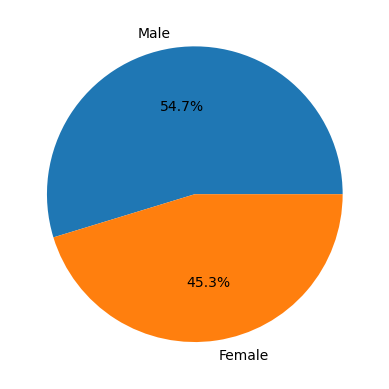

In [14]:
gender_counts = clean_diabetes_df['gender'].value_counts()#.plot(kind='pie', autopct='%1.1f%%')
plt.pie(gender_counts,labels=['Male','Female'],autopct='%.1f%%');

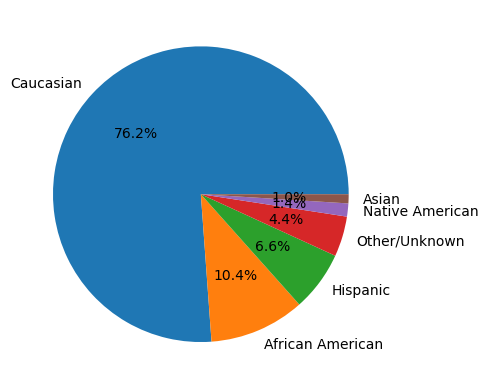

In [15]:
ethnicity_counts = clean_diabetes_df['ethnicity'].value_counts()#.plot(kind='pie', autopct='%1.1f%%')
plt.pie(ethnicity_counts,labels=ethnicity_counts.index,autopct='%.1f%%');

# Compile, Train, and Evaluate Model

In [16]:
# Modelmodel - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
# setting initial layer with 90 neurons (~2x # of inputs)
# input_dim is 46 because of the transformed # of input columns after get_dummies
nn.add(tf.keras.layers.Dense(units=90, activation='relu', input_dim=46))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Output layer
# use sigmoid activation function here because predicting binary classification
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

a:\Programming\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 90)             │         4,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         3,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,911 (30.90 KB)

 Trainable params: 7,911 (30.90 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
trained = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.7139 - loss: 2.9955
Epoch 2/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.7599 - loss: 0.6072
Epoch 3/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.7626 - loss: 0.5910
Epoch 4/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7606 - loss: 0.6317
Epoch 5/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7699 - loss: 0.5587
Epoch 6/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.7720 - loss: 0.5279
Epoch 7/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.7758 - loss: 0.5166
Epoch 8/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.7779 - loss: 0.4917
Epoch 9/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7810 - loss: 0.4733
Epoch 10/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7853 - loss: 0.4759
Epoch 11/100
895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7839 - loss: 0.4611
Epoch 12/100
895/89

# Analyze Features and Tune Model

In [19]:
!pip install scikeras scikit-learn
!pip install --upgrade scipy scikit-learn scikeras
#!pip install scipy==1.13.9

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 815.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.8 MB 4.5 MB/s eta 0:00:10
    --------------------------------------- 0.6/44.8 MB 7.4 MB/s eta 0:00:06
   - -------------------------------------- 1.2/44.8 MB 9.3 MB/s eta 0:00:05
   - -------------------------------------- 2.0/44.8 MB 11.5 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/44.8 MB 11.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.6/44.8 MB 13.4 MB/s eta 0:00:04
   --- ------------------------------------ 4.4/44.8 MB 14.0 MB/s eta 0:00:03
   ---- ----------------------------------- 5.3/44.8 MB 14.6 MB/s eta 0:00:03
   ----- ---------------------------------- 5.7/44.8 MB 14.0 MB/s eta 0:00:03

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [22]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

In [24]:
# Ensure that nn is defined as your Keras model
# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test is a DataFrame or convert it
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")


Weakest feature: height with importance -0.0016549701476903378
Weakest feature: heart_rate_apache with importance -0.0008065360846338798
Weakest feature: apache_post_operative with importance -0.000785587095422613
Weakest feature: gcs_eyes_apache with importance -0.0005237247302817494
Weakest feature: intubated_apache with importance -0.00042945427883103184
Weakest feature: d1_spo2_min with importance -0.0003037603435633751
Weakest feature: map_apache with importance -0.0002932858489577472
Weakest feature: d1_temp_max with importance -0.00024091337592957451
Weakest feature: d1_temp_min with importance -0.00021996438671828544
Weakest feature: gcs_motor_apache with importance -0.00020948989211266866
Weakest feature: d1_mbp_max with importance -9.427045145068424e-05
Weakest feature: d1_heartrate_min with importance -7.332146223941738e-05
Weakest feature: d1_mbp_min with importance -6.28469676338006e-05
Weakest feature: ethnicity_Hispanic with importance -5.237247302813941e-05
Weakest feat

In [25]:
# Wrap your Keras model
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")


Strongest feature: d1_glucose_max with importance 0.08978736775950563
Strongest feature: d1_glucose_min with importance 0.005970461925212145
Strongest feature: d1_heartrate_max with importance 0.0033413637791977037
Strongest feature: bmi with importance 0.0033308892845920536
Strongest feature: glucose_apache with importance 0.0031423483816906185
Strongest feature: apache_2_diagnosis with importance 0.002587200167591952
Strongest feature: apache_3j_diagnosis with importance 0.0022834398240285216
Strongest feature: arf_apache with importance 0.0017911385775636669
Strongest feature: age with importance 0.0017806640829580388
Strongest feature: d1_sysbp_min with importance 0.0017701895883523889
Strongest feature: d1_diasbp_min with importance 0.0016968681261129604
Strongest feature: resprate_apache with importance 0.0015606996962396868
Strongest feature: d1_diasbp_max with importance 0.0014664292447889693
Strongest feature: weight with importance 0.001340735309521357
Strongest feature: gcs_